In [1]:
# In this notebook, we analyse the HRC output in the cases of moving edges and moving bars.

In [2]:
# %matplotlib inline
# %matplotlib widget
# %matplotlib notebook

import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('../stimulus_core/')
sys.path.append('../models_core/')
sys.path.append('../helper/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import optical_signal as opsg

# Exponential temporal filter

## Moving edge, rightward increment

The exponential low pass filter for the slow channel is 
\begin{align*}
G(t-t^{'}) = \frac{1}{\tau}e^{-(t-t^{'})/\tau}
\end{align*}

We define a rightward increment moving edge as:
\begin{align*}
I(x,t,v) = \begin{cases}
           1,\ x-vt \leq 0, \\
           0,\ x-vt > 0,
           \end{cases}
\end{align*}
where $x \in [0, L]$, $v > 0$, and $t \in [0,L/v]$.

The low-pass filtered left input is 
\begin{align*}
I_{\text{s}}(x,t,v) &= \int_{0}^{t}dt^{'}\ G(t-t^{'})I(x,t^{'},v) \\
                    &= \frac{1}{\tau}e^{-t/\tau}\int_{x/v}^{t}dt^{'}\ e^{t^{'}/\tau} \\
                    &= e^{-t/\tau}\left[ e^{t/\tau}-e^{x/v\tau} \right] \\
                    &= 1-e^{-(t-x/v)/\tau},
\end{align*}
which requires $t \geq x/v$.

Similarly, the low-pass filtered right input is 
\begin{align*}
I_{\text{s}}(x+a,t,v) = 1-e^{-(t-(x+a)/v)/\tau},
\end{align*}
which requires $t \geq (x+a)/v$.

The HRC output then can be defined as
\begin{align*}
r(x,t,v|a,\tau) = I(x+a,t,v)I_{\text{s}}(x,t,v)-I(x,t,v)I_{\text{s}}(x+a,t,v),
\end{align*}
where $a$ is the spacial offset of the two receptors, and $\tau$ is the time delay in the slow pathway. 

In the increment case, the HRC output is non-zero only when $t \geq (x+a)/v$, which is
\begin{align*}
r(x,t,v|a,\tau) &= I_{\text{s}}(x,t,v)-I_{\text{s}}(x+a,t,v) \\
                &= e^{-(t-(x+a)/v)/\tau}-e^{-(t-x/v)/\tau} \\
                &= e^{-t/\tau}e^{x/v\tau}\left[ e^{a/v\tau}-1 \right]
\end{align*}
Since $t \geq (x+a)/v$, we have
\begin{align*}
r(x,t,v|a,\tau) \leq 1-e^{-a/v\tau}
\end{align*}

We define a rightward decrement moving edge as:
\begin{align*}
I(x,t,v) = \begin{cases}
           0,\ x-vt < 0, \\
           1,\ x-vt \geq 0,
           \end{cases}
\end{align*}
where $x \in [0, L]$, $v > 0$, and $t \in [0,L/v]$.

The low-pass filtered left input is 
\begin{align*}
I_{\text{s}}(x,t,v) &= \int_{0}^{t}dt^{'}\ G(t-t^{'})I(x,t^{'},v) \\
                    &= \frac{1}{\tau}e^{-t/\tau}\int_{0}^{x/v}dt^{'}\ e^{t^{'}/\tau} \\
                    &= e^{-t/\tau}\left[ e^{x/v\tau}-1 \right] \\
                    &= e^{-(t-x/v)/\tau}-e^{-t/\tau}.
\end{align*}

Similarly, the low-pass filtered right input is
\begin{align*}
I_{\text{s}}(x+a,t,v) &= e^{-(t-(x+a)/v)/\tau}-e^{-t/\tau}.
\end{align*}

In the decrement case, the HRC output is non-zero only when $x/v < t \leq (x+a)/v$, which is
\begin{align*}
r(x,t,v|a,\tau) &= I_{\text{s}}(x,t,v) \\
                &= e^{-(t-x/v)/\tau}-e^{-t/\tau}
\end{align*}
Since $x/v < t \leq (x+a)/v$, we have
\begin{align*}
e^{-a/v\tau}(1-e^{-x/v\tau}) \leq r(x,t,v|a,\tau) < 1-e^{-x/v\tau}
\end{align*}

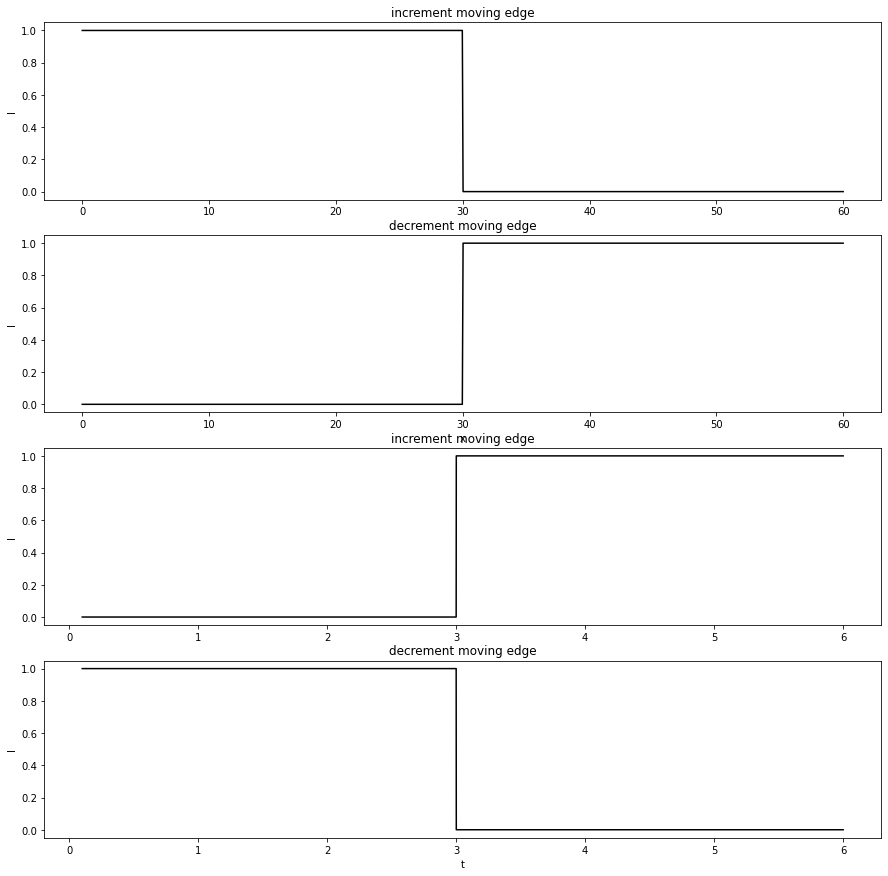

In [4]:
def increment_moving_edge(x, t, v, nega=False):
    intensity = (np.array(x - v * t) <= 0).astype(int)
    if nega:
        intensity[intensity == 0] = -1
    
    return intensity.reshape((-1, 1))

def decrement_moving_edge(x, t, v, nega=False):
    intensity = (np.array(x - v * t) >= 0).astype(int)
    if nega:
        intensity[intensity == 0] = -1
    
    return intensity.reshape((-1, 1))

nega = False
L = 60

fig = plt.figure(figsize=(15, 15))
gs0 = gridspec.GridSpec(4, 1, figure=fig)

# space
x = np.linspace(0, L, 1000)
v = 10
t = 3
I_incre = increment_moving_edge(x, t, v, nega=nega)
I_decre = decrement_moving_edge(x, t, v, nega=nega)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(x, I_incre, 'k')
ax.set_ylabel('I')
ax.set_title('increment moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(x, I_decre, 'k')
ax.set_xlabel('x')
ax.set_ylabel('I')
ax.set_title('decrement moving edge')

# time
x = 30
v = 10
dt = 0.001
t_list = np.linspace(0.1, L/np.abs(v), np.int((L/np.abs(v))/dt))
I_incre = increment_moving_edge(x, t_list, v, nega=nega)
I_decre = decrement_moving_edge(x, t_list, v, nega=nega)

ax = fig.add_subplot(gs0[2, 0])
ax.plot(t_list, I_incre, 'k')
ax.set_ylabel('I')
ax.set_title('increment moving edge')

ax = fig.add_subplot(gs0[3, 0])
ax.plot(t_list, I_decre, 'k')
ax.set_xlabel('t')
ax.set_ylabel('I')
ax.set_title('decrement moving edge')


plt.show()

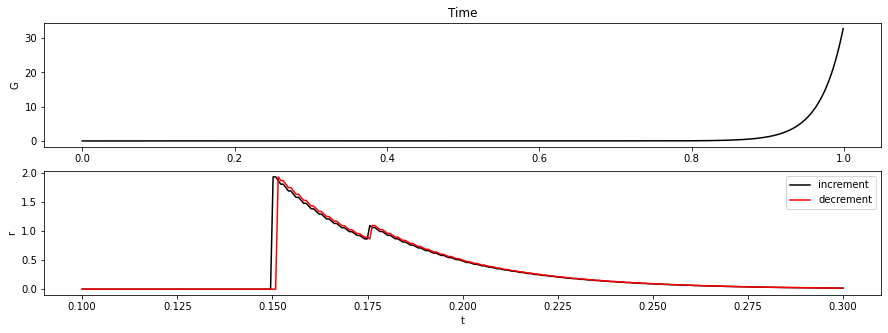

In [8]:
def temporal_filter(T, dt=0.001, tau_=0.03):
    t_prime = np.arange(T) * dt
    G = (1. / tau_) * np.exp(-(t - t_prime) / tau_)
    G = G / (G.sum() * dt)
    
    return G, t_prime

def get_temporal_filtered(signal, dt=0.001, tau_=0.03):
    T = len(signal)
    G, _ = temporal_filter(T, dt, tau_)
    filtered_signal = np.dot(G, signal) * dt
    
    return filtered_signal

def hrc_output_exp(x, t, v, stimulus_type, a=5., tau_=0.03, nega=False):
    t_prime = np.arange(0, t, dt)
    I_left = stimulus_type(x, t_prime, v, nega=nega)
    I_left_fast = I_left[-1]
    I_left_slow = get_temporal_filtered(I_left)
    I_right = stimulus_type(x+a, t_prime, v, nega=nega)
    I_right_fast = I_right[-1]
    I_right_slow = get_temporal_filtered(I_right)
    r = I_right_fast * I_left_slow - I_left_fast * I_right_slow
    
    return r

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

T = 1000
G, t_prime = temporal_filter(T)
ax = fig.add_subplot(gs0[0, 0])
ax.plot(t_prime, G, 'k')
ax.set_ylabel('G')
ax.set_title('Time')

nega = True
x1 = 30.
v1 = 200.
dt = 0.001
t_list = np.linspace(0.1, L/np.abs(v1), np.int((L/np.abs(v1))/dt))

r_incre = []
r_decre = []
for t in t_list:
    r = hrc_output_exp(x1, t, v1, increment_moving_edge, nega=nega)
    r_incre.append(r)
    r = hrc_output_exp(x1, t, v1, decrement_moving_edge, nega=nega)
    r_decre.append(r)

ax = fig.add_subplot(gs0[1, 0])
ax.plot(t_list, r_incre, 'k')
ax.plot(t_list, r_decre, 'r')
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.legend(['increment', 'decrement'])
plt.show()

# Delta temporal filter

## Moving edge

We define a moving edge as:
\begin{align*}
I(x,t,v) = \begin{cases}
           1,\ x-vt \leq 0, \\
           0,\ x-vt > 0,
           \end{cases}
\end{align*}
where $x \in [0, L]$, $v > 0$, and $t \in [0,L/v]$.

The HRC output then can be defined as
\begin{align*}
r(x,t,v|a,\tau) = I(x+a,t+\tau,v)I(x,t,v)-I(x,t+\tau,v)I(x+a,t,v),
\end{align*}
where $a$ is the spacial offset of the two receptors, and $\tau$ is the time delay in the slow pathway.

The conditions for the first term on the right hand side to be nonzero are
\begin{align*}
    \begin{cases}
    x+a-vt-v\tau \leq 0, \\
    x-vt \leq 0
    \end{cases}
\end{align*}
or 
\begin{align*}
    \begin{cases}
    t \geq x/v+a/v-\tau, \\
    t \geq x/v
    \end{cases}
\end{align*}

The conditions for the second term on the right hand side to be nonzero are
\begin{align*}
    \begin{cases}
    x-vt-v\tau \leq 0, \\
    x+a-vt \leq 0
    \end{cases}
\end{align*}
or 
\begin{align*}
    \begin{cases}
    t \geq x/v-\tau, \\
    t \geq x/v+a/v
    \end{cases}
\end{align*}
or simply
\begin{align*}
    t \geq x/v+a/v
\end{align*}

Now, we do a temporal integral on the HRC response:
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau).
\end{align*}

**Case I**: $a/v-\tau \geq 0$ or $v \leq a/\tau$
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v+a/v-\tau}^{L/v-\tau}dt - \int_{x/v+a/v}^{L/v-\tau}dt \\
&= \tau,
\end{align*}
which does not depend on $x$ and $v$. Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{\tau}{L/v-\tau} = \frac{v\tau}{L-v\tau} \approx \frac{v\tau}{L},
\end{align*}
where the last step holds when $L>>a$.

**Case II**: $a/v-\tau < 0$ or $v > a/\tau$
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v}^{L/v-\tau}dt - \int_{x/v+a/v}^{L/v-\tau}dt \\
&= a/v,
\end{align*}
which decays as $v$. Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{a/v}{L/v-\tau} = \frac{a}{L-v\tau} \approx \frac{a}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

## Moving bar

We define a moving bar as:
\begin{align*}
I(x,t,v) = \begin{cases}
           0,\ x-vt < 0 \\
           1,\ 0 \leq x-vt \leq p, \\
           0,\ x-vt > p,
           \end{cases}
\end{align*}
where $x \in [0, L]$, $v > 0$, $t \in [0,L/v-\tau]$, and $p > 0$ (bar width). 

Similar to the moving edge case, the conditions for the first term on the right hand side to be nonzero are
\begin{align*}
    \begin{cases}
    0 \leq x+a-vt-v\tau \leq p, \\
    0 \leq x-vt \leq p
    \end{cases}
\end{align*}
or 
\begin{align*}
    \begin{cases}
    t \geq x/v+a/v-\tau-p/v, \\
    t \leq x/v + a/v -\tau, \\
    t \geq x/v - p/v, \\
    t \leq x/v
    \end{cases}
\end{align*}

The conditions for the second term on the right hand side to be nonzero are
\begin{align*}
    \begin{cases}
    0 \leq x-vt-v\tau \leq p, \\
    0 \leq x+a-vt \leq p
    \end{cases}
\end{align*}
or 
\begin{align*}
    \begin{cases}
    t \geq x/v-\tau-p/v, \\
    t \leq x/v-\tau, \\
    t \geq x/v+a/v-p/v, \\
    t \leq x/v+a/v
    \end{cases}
\end{align*}
or simply
\begin{align*}
    \begin{cases}
    t \leq x/v-\tau, \\
    t \geq x/v+a/v-p/v.
    \end{cases}
\end{align*}
But for these two equations to hold, we also need
\begin{align*}
-\tau \geq a/v-p/v,
\end{align*}
or
\begin{align*}
v \leq (p-a)/\tau
\end{align*}

### Situation 1: $p \geq 2a$

**Case I**: $a/v-\tau > 0$ or $v < a/\tau$
\begin{align*}
    \begin{cases}
    t \geq x/v+a/v-\tau-p/v, \\
    t \leq x/v
    \end{cases}
\end{align*}

The integral is then
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v+a/v-\tau-p/v}^{x/v}dt - \int_{x/v+a/v-p/v}^{x/v-\tau}dt \\
&= -a/v+\tau+p/v-(-\tau-a/v+p/v) \\
&= 2\tau
\end{align*}
Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{2\tau}{L/v-\tau} = \frac{2v\tau}{L-v\tau} \approx \frac{2v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

**Case II**: $a/v-\tau \leq 0$ or $v \geq a/\tau$, and $v \leq (p-a)/\tau$
\begin{align*}
    \begin{cases}
    t \leq x/v + a/v -\tau, \\
    t \geq x/v - p/v, \\
    \end{cases}
\end{align*}

The integral is then
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v-p/v}^{x/v+a/v-\tau}dt - \int_{x/v+a/v-p/v}^{x/v-\tau}dt \\
&= a/v-\tau+p/v-(-\tau-a/v+p/v) \\
&= 2a/v
\end{align*}
Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{2a/v}{L/v-\tau} = \frac{2a}{L-v\tau} \approx \frac{2a}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

**Case III**: $v > (p-a)/\tau$ and of course $v > a/\tau$, since $p \geq 2a$
In this case, no second term.
The integral is then
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v-p/v}^{x/v+a/v-\tau}dt \\
&= a/v-\tau+p/v \\
\end{align*}
Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{a/v-\tau+p/v}{L/v-\tau} = \frac{a+p-v\tau}{L-v\tau} \approx \frac{a+p-v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

### Situation 2: $a \leq p < 2a$

**Case I**: $a/v-\tau > 0$ or $v < a/\tau$ and $v \leq (p-a)/\tau$

This is the same as in Situation 1, Case I.
\begin{align*}
\left< r \right>_{t} = \frac{2\tau}{L/v-\tau} = \frac{2v\tau}{L-v\tau} \approx \frac{2v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

**Case II**: $(p-a)/\tau < v < a/\tau$
\begin{align*}
    \begin{cases}
    t \geq x/v+a/v-\tau-p/v, \\
    t \leq x/v
    \end{cases}
\end{align*}

The integral is then
\begin{align*}
r(x,v|a,\tau) 
&= \int_{0}^{L/v-\tau}dt\ r(x,t,v|a,\tau) \\
&= \int_{x/v+a/v-\tau-p/v}^{x/v}dt \\
&= -a/v+\tau+p/v \\
\end{align*}
Taking a temporal average, we have then
\begin{align*}
\left< r \right>_{t} = \frac{-a/v+\tau+p/v}{L/v-\tau} = \frac{p-a+v\tau}{L-v\tau} \approx \frac{p-a+v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

**Case III**: $v \geq a/\tau$

This is the same as in Situation 1, Case III.
\begin{align*}
\left< r \right>_{t} = \frac{a/v-\tau+p/v}{L/v-\tau} = \frac{a+p-v\tau}{L-v\tau} \approx \frac{a+p-v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

### Situation 3: $p < a$

**Case I**: $v < a/\tau$

This is the same as in Situation 2, Case II.
\begin{align*}
\left< r \right>_{t} = \frac{-a/v+\tau+p/v}{L/v-\tau} = \frac{p-a+v\tau}{L-v\tau} \approx \frac{p-a+v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

**Case II**: $v \geq a/\tau$

This is the same as in Situation 1, Case III.
\begin{align*}
\left< r \right>_{t} = \frac{a/v-\tau+p/v}{L/v-\tau} = \frac{a+p-v\tau}{L-v\tau} \approx \frac{a+p-v\tau}{L},
\end{align*}
where the last step holds when $L>>v\tau$.

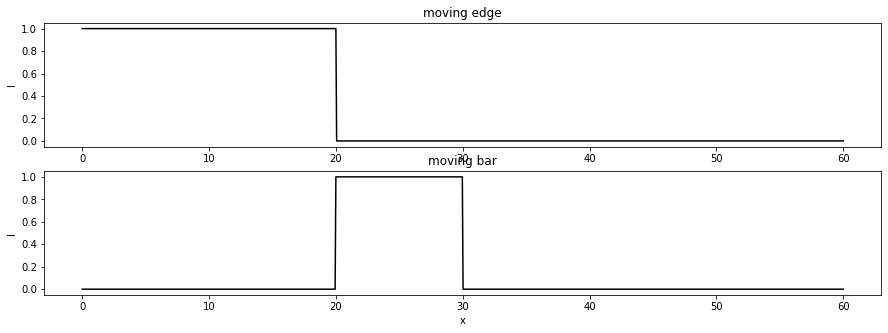

In [105]:
def moving_edge_step(x, t, v, nega=False):
    intensity = (np.array(x - v * t) <= 0).astype(int)
    if nega:
        intensity[intensity == 0] = -1
    
    return intensity


def moving_bar_step(x, t, v, p=10, nega=False):
    cond1 = (np.array(x - v * t) >= 0).astype(int)
    cond2 = (np.array(x - v * t) <= p).astype(int)
    intensity = cond1 * cond2
    if nega:
        intensity[intensity == 0] = -1
    
    return intensity


nega = False
L = 60
x = np.linspace(0, L, 1000)
v = 10
t = 2
p = 10
I_edge = moving_edge_step(x, t, v, nega=nega)
I_bar = moving_bar_step(x, t, v, p, nega=nega)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(x, I_edge, 'k')
ax.set_ylabel('I')
ax.set_title('moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(x, I_bar, 'k')
ax.set_xlabel('x')
ax.set_ylabel('I')
ax.set_title('moving bar')

plt.show()

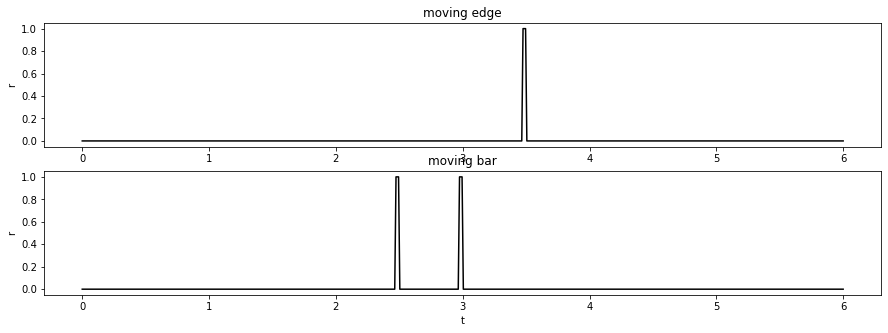

In [170]:
def hrc_output(x, t, v, stimulus_type, a=5., tau_=0.03, nega=False):
    I_left_slow = stimulus_type(x, t, v, nega=nega)
    I_left_fast = stimulus_type(x, t+tau_, v, nega=nega)
    I_right_slow = stimulus_type(x+a, t, v, nega=nega)
    I_right_fast = stimulus_type(x+a, t+tau_, v, nega=nega)
    
    r = I_right_fast * I_left_slow - I_left_fast * I_right_slow
    
    return r

def hrc_output_analytical_edge(v, L=60., a=5., tau_=0.03):
    
    if v < a / tau_: # case I
        r = v * tau_ / L
    elif v >= a / tau_: # case II
        r = a / L
        
    return r

def hrc_output_analytical_bar_situation1(v, L=60., p=10., a=5., tau_=0.03):
    
    if v < a / tau_: # case I
        r = 2 * v * tau_ / L
    elif v >= a / tau_ and v <= (p - a) / tau_: # case II
        r = 2 * a / L 
    elif v > (p - a) / tau_: # case III
        r = (a + p - v * tau_) / L 
        
    return r

nega = False
x1 = 30.
v1 = 10.
t = np.linspace(0, L/np.abs(v1), np.int((L/np.abs(v1))/0.01))

# moving edge
r_edge = hrc_output(x1, t, v1, moving_edge_step, nega=nega)
# moving bar
r_bar = hrc_output(x1, t, v1, moving_bar_step, nega=nega)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(t, r_edge, 'k')
# ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_title('moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(t, r_bar, 'k')
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.set_title('moving bar')

plt.show()

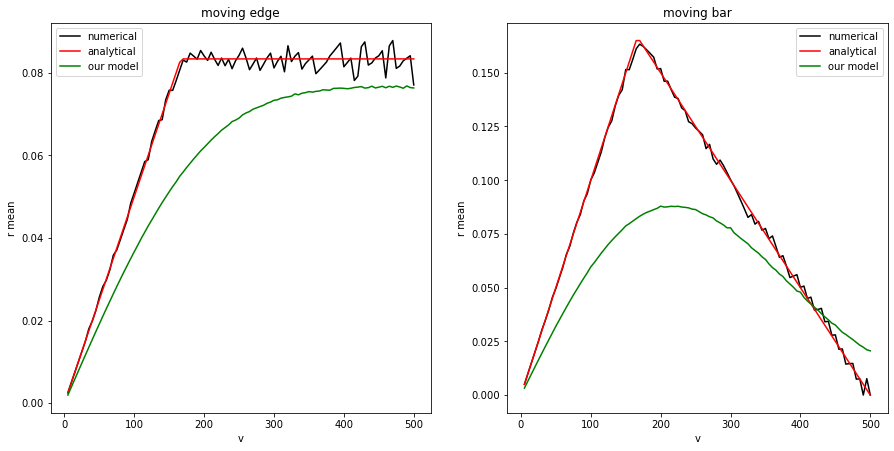

In [137]:
####### Analytical and numerical
x1 = L / 2.
v1_list = np.linspace(5, 500, 100)
r_sum_edge = []
r_tmean_edge = []
r_tmean_edge_analytical = []
r_sum_bar = []
r_tmean_bar = []
r_tmean_bar_analytical = []

fig = plt.figure(figsize=(15, 15))
gs0 = gridspec.GridSpec(4, 1, figure=fig)

LL = len(v1_list)
for ind, v1 in enumerate(v1_list):
    t = np.linspace(0.01, L/v1, np.int((L/v1)/0.001))
    dt = t[1] - t[0]

    # moving edge
    r_edge = hrc_output(x1, t, v1, moving_edge_step)
    r_sum_edge.append(r_edge.sum())
    r_tmean_edge.append(r_edge.sum() * dt * v1 / L)
    r_tmean_edge_analytical.append(hrc_output_analytical_edge(v1))
    # moving bar
    r_bar = hrc_output(x1, t, v1, moving_bar_step)
    r_sum_bar.append(r_bar.sum())
    r_tmean_bar.append(r_bar.sum() * dt * v1 / L)
    r_tmean_bar_analytical.append(hrc_output_analytical_bar_situation1(v1))

#     ax = fig.add_subplot(gs0[0, 0])
#     ax.plot(t, r_edge, c=[0+ind/(LL*1.1), 0, 0], alpha=1)
#     ax.set_ylim([0, 1.1])
#     ax.set_xscale('log')
#     ax.set_xticklabels([])
#     ax.set_ylabel('r')
#     ax.set_title('moving edge')

#     ax = fig.add_subplot(gs0[1, 0])
#     ax.plot(t, r_bar, c=[0+ind/(LL*1.1), 0, 0], alpha=1)
#     ax.set_ylim([0, 1.1])
#     ax.set_xscale('log')
#     ax.set_xlabel('t')
#     ax.set_ylabel('r')
#     ax.set_title('moving bar')
    
####### From our HRC model
# HRC tuning curve
def get_angular_velocity(R, v, theta_b):
    theta_b_dot = 2. * v / R * np.sin(theta_b/2) * np.tan(theta_b/2) * (180/np.pi)
    return theta_b_dot

R = 1
theta_b = np.pi/3
theta_b_dot_max = get_angular_velocity(R, 10, theta_b)
theta_b_dot_min = get_angular_velocity(R, 2, theta_b)

v_deg_list = range(5, 501, 5)
save_path = '/Volumes/Baohua/data_on_hd/loom/hrc_tuning/'

# Expanding disk, Delta filter
ED_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'expanding_disk_delta/UV_flow_L{50}_v_{v_deg}_delta.npy')
    UV_flows_reshaped = UV_flows.reshape((-1, 12, 12, 4))
    ED_delta_average.append(UV_flows_reshaped[:, 6, 6, 0].mean())
# Moving edge
ME_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_edge_delta/UV_flow_L{50}_v_{v_deg}_delta.npy')
    UV_flows_reshaped = UV_flows.reshape((-1, 12, 12, 4))
    ME_delta_average.append(UV_flows_reshaped[:, 5, 5, 0].mean())
# Moving bar
MB_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_bar_delta/UV_flow_L{50}_v_{v_deg}_delta.npy')
    UV_flows_reshaped = UV_flows.reshape((-1, 12, 12, 4))
    MB_delta_average.append(UV_flows_reshaped[:, 5, 5, 0].mean())


gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[2:, 0])
ax = fig.add_subplot(gs00[0, 0])
ax.plot(v1_list, r_tmean_edge, 'k', alpha=1)
ax.plot(v1_list, r_tmean_edge_analytical, 'r', alpha=1)
ax.plot(v1_list, ME_delta_average, 'g', alpha=1)
# ax.set_ylim([0, 0.12])
ax.set_xlabel('v')
ax.set_ylabel('r mean')
ax.set_title('moving edge')
ax.legend(['numerical', 'analytical', 'our model'])

ax = fig.add_subplot(gs00[0, 1])
ax.plot(v1_list, r_tmean_bar, 'k', alpha=1)
ax.plot(v1_list, r_tmean_bar_analytical, 'r', alpha=1)
ax.plot(v1_list, MB_delta_average, 'g', alpha=1)
# ax.set_ylim([0, 0.12])
ax.set_xlabel('v')
ax.set_ylabel('r mean')
ax.set_title('moving bar')
ax.legend(['numerical', 'analytical', 'our model'])

plt.show()

# Relation between angular size an distance

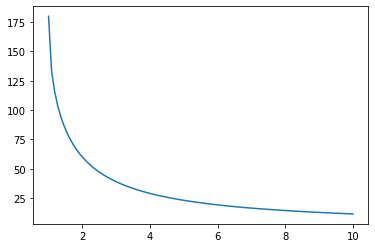

Angular size at D = 4R is 28.955024371859846
Angular size at D = R is 180.0
Angular size at D = 5R is 23.07391806563098
Angular size at D = 2R is 60.0


In [99]:
R = 1
x = 0
y = 0
z_list = np.linspace(1, 10, 100)
thetas = []

for z in z_list:
    thetas.append(opsg.get_angular_size(x, y, z, R))
thetas = np.array(thetas)

plt.plot(z_list, 2 * thetas / np.pi * 180)
plt.show()

print(f'Angular size at D = 4R is {2 * opsg.get_angular_size(x, y, 4, R)/np.pi*180}')
print(f'Angular size at D = R is {2 * opsg.get_angular_size(x, y, 1, R)/np.pi*180}')
print(f'Angular size at D = 5R is {2 * opsg.get_angular_size(x, y, 5, R)/np.pi*180}')
print(f'Angular size at D = 2R is {2 * opsg.get_angular_size(x, y, 2, R)/np.pi*180}')

# Ignore everything below

Consider only a 1d system, measured by $x \in [0, L]$.

The moving edge can be approximated as a flipped sigmoid function:
\begin{align}
I(x,t,v|\alpha) = \frac{1}{1+e^{\alpha (x-vt)}},
\end{align}
where $I$ is the intensity, $t$ is time, $v$ is the velocity of the moving edge, and $\alpha$ is some smoothing constant.
Alternatively, the moving edge can also be approximated as an error function:
\begin{align}
I(x,t,v|\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \int_{x-vt}^{\infty}dz e^{-\frac{z^{2}}{2\sigma^{2}}},
\end{align}
where $I$ is the intensity, $t$ is time, $v$ is the velocity of the moving edge, and $\alpha$ is some smoothing constant.

The moving bar can be approximated as a Gaussian-like function:
\begin{align}
I(x,t,v|\sigma) = e^{-\frac{(x-vt)^{2}}{2\sigma^{2}}},
\end{align}
where $\sigma$ is some smoothing constant. 

Now, we build the HRC model with two inputs. Consider the two input arms located at $x$ and $x+a$, respectively. The delay on the left arm is $\tau$. Then, we have a simple HRC model:
\begin{align}
r(x,t,v|a,\tau) = I(x+a,t+\tau,v)I(x,t,v)-I(x,t+\tau,v)I(x+a,t,v).
\end{align}

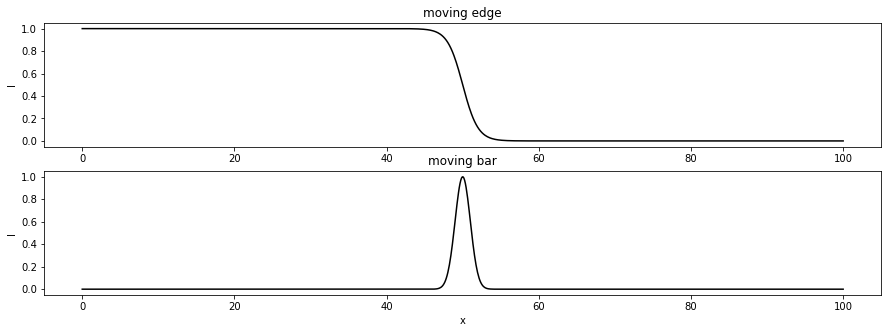

In [3]:
# moving edge
def moving_edge_sigmoid(x, t, v, alpha_=1.):
    intensity = 1. / (1. + np.exp(alpha_ * (x - v*t)))
    
    return intensity

# moving bar
def moving_bar(x, t, v, sigma_=1.):
    intensity = np.exp(-(x - v * t)**2/(2 * sigma_**2))
    
    return intensity
    
L = 100
x = np.linspace(0, L, 1000)
v = 10
t = 5
I_edge = moving_edge(x, t, v)
I_bar = moving_bar(x, t, v)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(x, I_edge, 'k')
# ax.set_xlabel('x')
ax.set_ylabel('I')
ax.set_title('moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(x, I_bar, 'k')
ax.set_xlabel('x')
ax.set_ylabel('I')
ax.set_title('moving bar')

plt.show()

# Analytical 

### The moving edge case

\begin{align}
r(x_{1},t,v|a,\tau) &= I(x_{1}+a,t+\tau,v)I(x_{1},t,v)-I(x_{1},t+\tau,v)I(x_{1}+a,t,v) \\
                &=\frac{1}{1+e^{\alpha (x_{1}+a-vt-v\tau)}}\frac{1}{1+e^{\alpha (x_{1}-vt)}} \\
                &-\frac{1}{1+e^{\alpha (x_{1}-vt-v\tau)}}\frac{1}{1+e^{\alpha (x_{1}+a-vt)}}.
\end{align}
Now, take $x_{1}-vt=b$ (or $t=x_{1}/v-b/v$) and we have then
\begin{align}
r(x_{1},t,v|a,\tau) &=\frac{1}{1+e^{\alpha (a+b-v\tau)}}\frac{1}{1+e^{\alpha b}} \\
                    &-\frac{1}{1+e^{\alpha (b-v\tau)}}\frac{1}{1+e^{\alpha (a+b)}}. \\
                    &=\frac{\left[ 1+e^{\alpha (b-v\tau)} \right]\left[ 1+e^{\alpha (a+b)} \right]-\left[ 1+e^{\alpha (a+b-v\tau)} \right]\left[ 1+e^{\alpha b} \right]}{\left[ 1+e^{\alpha (b-v\tau)} \right]\left[ 1+e^{\alpha (a+b)} \right]\left[ 1+e^{\alpha (a+b-v\tau)} \right]\left[ 1+e^{\alpha b} \right]} \\
                    &=\frac{e^{\alpha (b-v\tau)}+e^{\alpha (a+b)}-e^{\alpha (a+b-v\tau)} -e^{\alpha b}}{\left[ 1+e^{\alpha (b-v\tau)} \right]\left[ 1+e^{\alpha (a+b)} \right]\left[ 1+e^{\alpha (a+b-v\tau)} \right]\left[ 1+e^{\alpha b} \right]} \\
                    &=\frac{e^{\alpha b}\left[e^{-\alpha v\tau}+e^{\alpha a}-e^{\alpha a- \alpha v\tau)} - 1 \right]}{\left[ 1+e^{\alpha (b-v\tau)} \right]\left[ 1+e^{\alpha (a+b)} \right]\left[ 1+e^{\alpha (a+b-v\tau)} \right]\left[ 1+e^{\alpha b} \right]} \\
                    &=\frac{e^{\alpha b}\left(e^{\alpha a}-1\right)\left(1-e^{-\alpha v\tau}\right)}{\left[ 1+e^{\alpha b} \right]\left[ 1+e^{\alpha (a+b)} \right]\left[ 1+e^{\alpha (b-v\tau)} \right]\left[ 1+e^{\alpha (a+b-v\tau)} \right]} \\
                    &=\begin{cases}
                       0, & \text{if $v \rightarrow 0$}.\\
                       \frac{e^{\alpha b}\left(e^{\alpha a}-1\right)}{\left[ 1+e^{\alpha b} \right]\left[ 1+e^{\alpha (a+b)} \right]}, & \text{if $v \rightarrow \infty$}.
                      \end{cases}
\end{align}


### The moving bar case
\begin{align}
r(x_{1},t,v|a,\tau) &= I(x_{1}+a,t+\tau,v)I(x_{1},t,v)-I(x_{1},t+\tau,v)I(x_{1}+a,t,v) \\
                &=e^{-\frac{(x_{1}+a-vt-v\tau)^{2}}{2\sigma^{2}}}e^{-\frac{(x_{1}-vt)^{2}}{2\sigma^{2}}} \\
                &-e^{-\frac{(x-vt-v\tau)^{2}}{2\sigma^{2}}}e^{-\frac{(x+a-vt)^{2}}{2\sigma^{2}}}.
\end{align}
Similar to the moving edge case, take $x_{1}-vt=b$, and we have then
\begin{align}
r(x_{1},t,v|a,\tau) &=e^{-\frac{(a+b-v\tau)^{2}}{2\sigma^{2}}}e^{-\frac{b^{2}}{2\sigma^{2}}} \\
                &-e^{-\frac{(b-v\tau)^{2}}{2\sigma^{2}}}e^{-\frac{(a+b)^{2}}{2\sigma^{2}}}. \\
                &=e^{-\frac{(a+b)^{2}}{2\sigma^{2}}}e^{-\frac{(b-v\tau)^{2}}{2\sigma^{2}}}\left(e^{\frac{2av\tau}{2\sigma^{2}}}-1\right) \\
                &=\begin{cases}
                       0, & \text{if $v \rightarrow 0$}.\\
                       0, & \text{if $v \rightarrow \infty$}.
                      \end{cases}
\end{align}

# Numerical 

In the followig cell, we simulate the HRC output at a specific $x=x_{1}$ as a function of time for a specific $v=v_{1}$.

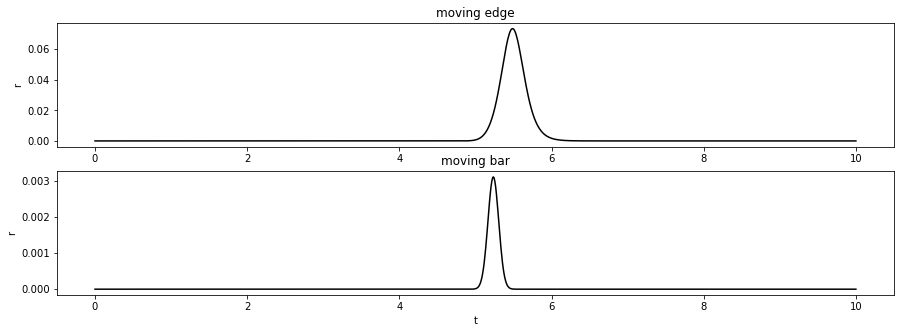

In [5]:
def hrc_output(x, t, v, stimulus_type, a=5., tau_=0.03):
    I_left_slow = stimulus_type(x, t, v)
    I_left_fast = stimulus_type(x, t+tau_, v)
    I_right_slow = stimulus_type(x+a, t, v)
    I_right_fast = stimulus_type(x+a, t+tau_, v)
    
    r = I_right_fast * I_left_slow - I_left_fast * I_right_slow
    
    return r

x1 = 50.
v1 = 10.
t = np.linspace(0, L/v1, np.int((L/v1)/0.01))

# moving edge
r_edge = hrc_output(x1, t, v1, moving_edge)
# moving bar
r_bar = hrc_output(x1, t, v1, moving_bar)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(t, r_edge, 'k')
# ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_title('moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(t, r_bar, 'k')
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.set_title('moving bar')

plt.show()

If we vary the velocity:

28.3557070610656
28.31335867664903
28.23786410006456
28.13879416817597
28.012421430980325
27.851828621886266
27.665108745611864
27.448368911485534
27.172073349438868
26.874909320254446
26.531812300894256
26.158383210293408
25.775233767748716
25.307686319016717
24.84384878045889
24.35362657797341
23.791369001248153
23.272203173201447
22.69586572612877
22.129038525409033
21.547502406225043
20.969004678487966
20.361445323472555
19.785997812511546
19.255344258892173
18.681011515234797
18.170104310372643
17.629929041493288
17.116161492792273
16.63379177920788
16.18693280243406
15.727714704294023
15.309804605197524
14.935458302486303
14.554874113937345
14.169206087234148
13.831181344838985
13.48989784768497
13.145919162505145
12.851720610954423
12.555753523066564
12.310443153166615
12.01172988903536
11.764156100984902
11.515676717807949
11.318784319663877
11.068802024234818
10.870642428843405
10.61937176280104
10.472733244645072


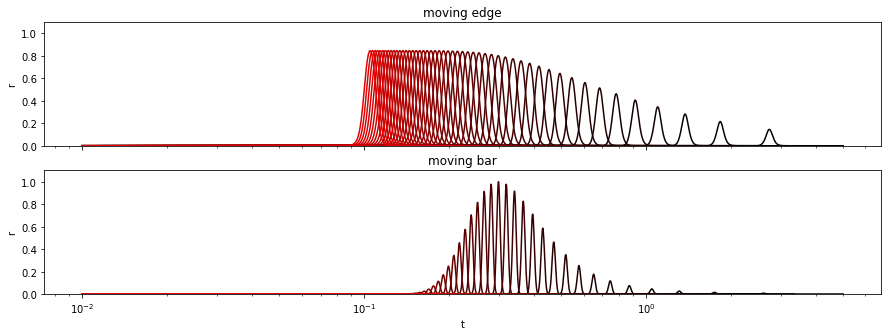

In [9]:
x1 = 50.
v1_list = np.linspace(20, 500, 50)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

LL = len(v1_list)
for ind, v1 in enumerate(v1_list):
    t = np.linspace(0.01, L/v1, np.int((L/v1)/0.001))

    # moving edge
    r_edge = hrc_output(x1, t, v1, moving_edge)
    print(r_edge.sum())
    # moving bar
    r_bar = hrc_output(x1, t, v1, moving_bar)

    ax = fig.add_subplot(gs0[0, 0])
    ax.plot(t, r_edge, c=[0+ind/(LL*1.1), 0, 0], alpha=1)
    ax.set_ylim([0, 1.1])
    ax.set_xscale('log')
    ax.set_xticklabels([])
    ax.set_ylabel('r')
    ax.set_title('moving edge')

    ax = fig.add_subplot(gs0[1, 0])
    ax.plot(t, r_bar, c=[0+ind/(LL*1.1), 0, 0], alpha=1)
    ax.set_ylim([0, 1.1])
    ax.set_xscale('log')
    ax.set_xlabel('t')
    ax.set_ylabel('r')
    ax.set_title('moving bar')

plt.show()

Next, we look at how the HRC output depends on the velocities. To do this, we always focus on a specifc point in the space $x_{1}$ (left arm), and when the velocity $v$ is changing, then the time $t$ that the edge or bar arrives at the location $x_{1}$ varies.

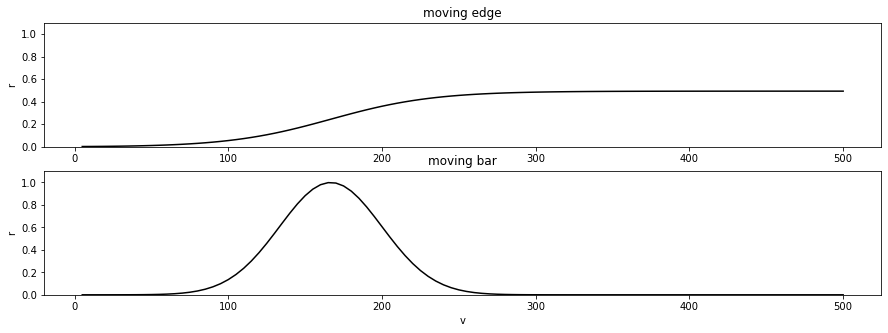

In [7]:
b = 0
tau_ = 0.03
x1 = L / 2 
v = np.linspace(5, 500, 100)
t = x1 / v - b/v

# moving edge
r_edge_v = hrc_output(x1, t, v, moving_edge)
# moving bar
r_bar_v = hrc_output(x1, t, v, moving_bar)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

ax = fig.add_subplot(gs0[0, 0])
ax.plot(v, r_edge_v, 'k')
ax.set_ylim([0, 1.1])
ax.set_ylabel('r')
ax.set_title('moving edge')

ax = fig.add_subplot(gs0[1, 0])
ax.plot(v, r_bar_v, 'k')
ax.set_ylim([0, 1.1])
ax.set_xlabel('v')
ax.set_ylabel('r')
ax.set_title('moving bar')

plt.show()

If we vary $b$:

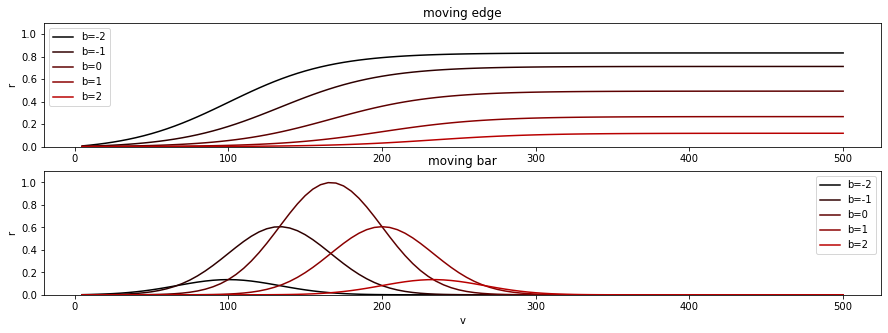

In [8]:
b_list = [-2, -1, 0, 1, 2]
tau_ = 0.03
x1 = L / 2 
v = np.linspace(5, 500, 100)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(2, 1, figure=fig)

LL = len(b_list)
for ind, b in enumerate(b_list):
    t = x1 / v - b/v

    # moving edge
    r_edge_v = hrc_output(x1, t, v, moving_edge)
    # moving bar
    r_bar_v = hrc_output(x1, t, v, moving_bar)

    ax = fig.add_subplot(gs0[0, 0])
    ax.plot(v, r_edge_v, c=[0+ind/(LL*1.1), 0, 0])
    ax.set_ylim([0, 1.1])
    ax.set_ylabel('r')
    ax.set_title('moving edge')
    legend_list = ['b='+str(b) for b in b_list]
    ax.legend(legend_list)

    ax = fig.add_subplot(gs0[1, 0])
    ax.plot(v, r_bar_v, c=[0+ind/(LL*1.1), 0, 0])
    ax.set_ylim([0, 1.1])
    ax.set_xlabel('v')
    ax.set_ylabel('r')
    ax.set_title('moving bar')
    legend_list = ['b='+str(b) for b in b_list]
    ax.legend(legend_list)

plt.show()

In [14]:
from scipy import signal

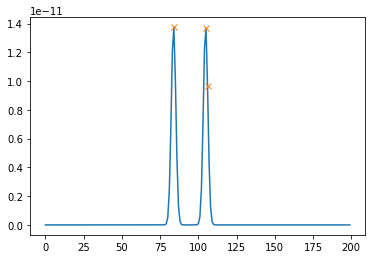

In [28]:
r_bar1 = hrc_output(x1, t, v1, moving_bar)
r_bar2 = hrc_output(x1+10, t, v1, moving_bar)
peaks = signal.find_peaks_cwt(r_bar1 + r_bar2, [1, 7])
plt.plot(r_bar1 + r_bar2)
plt.plot(peaks, (r_bar1 + r_bar2)[peaks], 'x')
plt.plot
plt.show()